In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
import matplotlib.cm as cm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df['Level_cat'] = np.array([0 if u == "Low" else 1 if u == "Medium" else 2 for u in df['Level']])
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_cat
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,0
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,1
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,2
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,3,2,7,8,2,4,5,3,High,2
996,996,P996,37,2,6,8,7,7,7,6,...,6,5,7,2,4,3,1,4,High,2
997,997,P997,25,2,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,2
998,998,P998,18,2,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,2


In [5]:
df = df.drop(["Patient Id", "Level"], axis=1)

In [6]:
df

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_cat
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,2
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,2
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [7]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

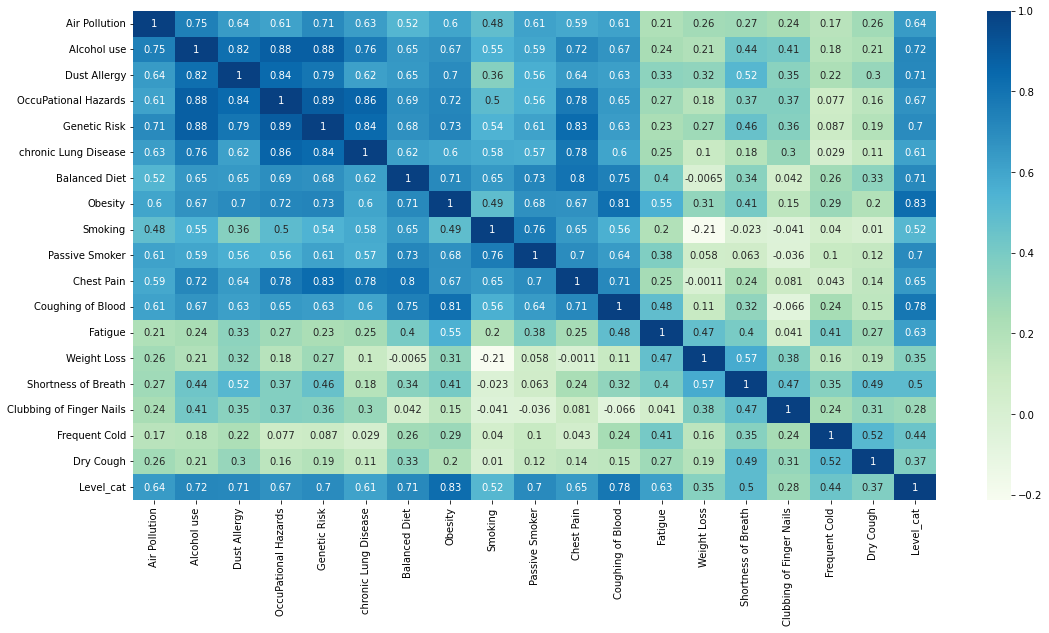

In [11]:
new_df = df.drop(["index", "Age", "Gender", "Wheezing", "Swallowing Difficulty", "Snoring"], axis=1)
plt.figure(figsize = (18,9))
sns.heatmap(new_df.corr(), cmap='GnBu', annot=True)
plt.show()

# Ridge Regression penalty term (l2)

In [12]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]
# Obtaining the Cross validation scores for a l2 penalty term (Ridge)
cross_val_score(LogisticRegression(max_iter=10000 ,C=10e-4, multi_class='multinomial', solver='saga'), X, y, cv=10)

array([0.95, 0.95, 0.92, 0.95, 0.97, 0.95, 0.94, 0.96, 0.95, 0.96])

In [13]:
# Perform Grid search cross validation for a l2 penalty term (Ridge)

clf = GridSearchCV(LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga'), {
    'C': [1, 0.1, 0.01, 0.001, 0.0001]
}, cv=5, return_train_score=True)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.53374634, 1.53195653, 0.96966038, 0.74236655, 0.33096237]),
 'std_fit_time': array([0.03926295, 0.08267769, 0.07691454, 0.01577083, 0.03411855]),
 'mean_score_time': array([0.0016048 , 0.00160413, 0.00080004, 0.00240011, 0.00079999]),
 'std_score_time': array([0.00196548, 0.00196467, 0.00160007, 0.00195968, 0.00159998]),
 'param_C': masked_array(data=[1, 0.1, 0.01, 0.001, 0.0001],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.001}, {'C': 0.0001}],
 'split0_test_score': array([0.985, 1.   , 0.96 , 0.95 , 0.86 ]),
 'split1_test_score': array([0.99 , 1.   , 0.95 , 0.935, 0.875]),
 'split2_test_score': array([0.995, 1.   , 0.965, 0.96 , 0.89 ]),
 'split3_test_score': array([1.   , 1.   , 0.965, 0.955, 0.905]),
 'split4_test_score': array([1.   , 1.   , 0.965, 0.95 , 0.885]),
 'mean_test_score': array([0.994, 1.   , 0.961, 0.95 , 0.883]),
 'std_test

We want to get the smallest possible value for our regularization term, without underfitting the model, since a smaller value for C will reduce the variance of the model as much as possible, meaning that the model won't have a lot of noisy variables as their weights are effectively reduced to a value close to 0 when using the Ridge Regression penalty term. We performed Cross validation 5 times on the data set using the GridSearchCV and also tested all these CV sets on 5 different values for C, being 1, 0.1, 0.01, 0.001 and 0.0001. It is clear that there is a trade off between score and the lower value of C, so we have to find a value for C that is as small as possible, but still obtains a high score. Looking at the results above, we can see that for a value of C between 0.01 and 0.001, we obtain a low value of C and a high accuracy score. 

In [14]:
num = 0

0.9566666666666667
(3, 23)
[[ 0.00349956  0.07564566  0.00187633 -0.08873688 -0.07563613 -0.00781387
  -0.11657402 -0.02691976  0.01241486 -0.20817814  0.02199958 -0.1542696
   0.02059128 -0.11996267 -0.21862027 -0.04302685 -0.1357253  -0.16700967
  -0.16127116 -0.17389683 -0.10376639 -0.06654005 -0.12544612]
 [ 0.03886964 -0.03317809 -0.20699734 -0.0840898   0.19922997  0.04833318
   0.09823517  0.00280532 -0.12396349  0.05373437 -0.11943557 -0.12289513
   0.02638378 -0.0574698  -0.05097421 -0.02385986  0.04300169  0.19461584
   0.08039883  0.16224228  0.04968233 -0.04270293  0.19841117]
 [-0.0423692  -0.04246757  0.20512102  0.17282668 -0.12359384 -0.04051931
   0.01833885  0.02411444  0.11154863  0.15444376  0.09743599  0.27716473
  -0.04697507  0.17743248  0.26959448  0.0668867   0.09272361 -0.02760618
   0.08087233  0.01165455  0.05408405  0.10924298 -0.07296504]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Dise

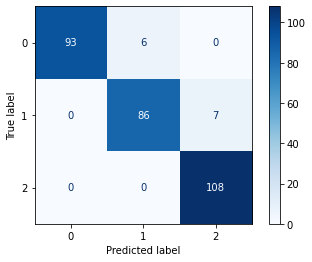

In [15]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.01, multi_class='multinomial', solver='saga')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

0.9366666666666666
(3, 23)
[[-0.00365283  0.0074146  -0.01314565 -0.05430778 -0.06754534 -0.04203639
  -0.0509959  -0.02493052 -0.01785867 -0.08043233  0.00420463 -0.04281782
  -0.0309927  -0.05838576 -0.07999515 -0.05635648 -0.07468827 -0.07851138
  -0.08143137 -0.07599687 -0.06093164 -0.02870606 -0.06155077]
 [ 0.02028522 -0.00137211 -0.07236794 -0.00875145  0.05746503  0.02351062
   0.01817448 -0.00448483 -0.04970949 -0.00301596 -0.08081497 -0.05884761
   0.00209291 -0.04174594 -0.02508536  0.01519913  0.03247076  0.09074721
   0.05017696  0.07387436  0.01142397 -0.02624936  0.0582652 ]
 [-0.01663239 -0.00604249  0.08551358  0.06305923  0.01008031  0.01852577
   0.03282143  0.02941535  0.06756816  0.08344829  0.07661034  0.10166544
   0.02889979  0.1001317   0.10508052  0.04115735  0.04221751 -0.01223582
   0.03125441  0.0021225   0.04950767  0.05495542  0.00328557]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Dis

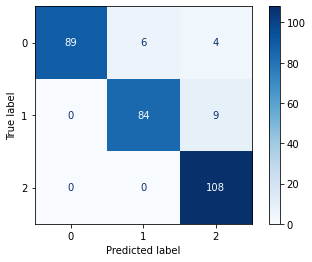

In [16]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.001, multi_class='multinomial', solver='saga')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

When Investigating the relationship between a penalty term of 0.01 and 0.001, we can see that they have a score of 0.956667 and 0.9366666 respectively. We can also see that for a penalty term of 0.001, we obtain weights that are really close to 0, meaning that variables that contains more noise in the model has an effectively low value, that it almost has no effect on predicting the target variable. So all that is left to do is find the value between 0.01 and 0.001 that minimizes C and obtains a high score.

In [17]:
# Perform Grid search cross validation for a l2 penalty term (Ridge)
clf = GridSearchCV(LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga'), {
    'C': [0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]
}, cv=5, return_train_score=True)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.93040714, 0.93608198, 0.95673733, 0.94674048, 0.93251295,
        0.97959223, 0.90927901, 0.93365908, 0.96785913, 0.77177339]),
 'std_fit_time': array([0.02811608, 0.01729609, 0.01916711, 0.01175959, 0.01230183,
        0.0415494 , 0.0159737 , 0.07800092, 0.03459467, 0.05248368]),
 'mean_score_time': array([0.00159316, 0.00239763, 0.00160022, 0.00326681, 0.00080009,
        0.00427384, 0.00080018, 0.00232134, 0.00399981, 0.00084662]),
 'std_score_time': array([1.95121637e-03, 1.95766569e-03, 1.95985857e-03, 1.63852796e-03,
        1.60017014e-03, 7.76427685e-04, 1.60036087e-03, 1.90076451e-03,
        1.51240840e-06, 1.69324875e-03]),
 'param_C': masked_array(data=[0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003,
                    0.002, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.009},
  {'C

After investigating the C terms between 0.01 and 0.001 by looking at each C values mean test score and taking into account the standard deviation between all of the cross validation scores, we can see that the smallest possible number for C that also obtains a great score and a low std_test_score is 0.005, meaning that 0.005 is the best hyperparamater to use when fitting the model.

std_test_score represents the standard deviation of the test scores obtained during cross-validation for each parameter combination.

It is very important to look at the std_test_score values, as it shows us what the deviation between all the scores are. This is important, because we might obtain a large mean_test_score because of two or three high prediction accuracies, while the other scores are not as great, meaning that the mean_test_score will be high. We can then use the std_test_score to see that the results vary a lot between each test data set.

0.9433333333333334
(3, 23)
[[-0.00189173  0.03295401 -0.00437735 -0.0710026  -0.08846966 -0.03440702
  -0.08969873 -0.02869695 -0.00290348 -0.161604    0.01352693 -0.10444843
  -0.01423349 -0.09968195 -0.16304425 -0.0645797  -0.11917835 -0.14695148
  -0.14921935 -0.14631504 -0.10083739 -0.05468794 -0.1177746 ]
 [ 0.03246112 -0.01345381 -0.1552175  -0.04739829  0.13719552  0.04337596
   0.06042943 -0.00260606 -0.09475794  0.03001054 -0.11598551 -0.09929881
   0.02193599 -0.05570759 -0.04285231 -0.01013649  0.04100732  0.16351133
   0.07715275  0.13063418  0.03307096 -0.04333573  0.14583333]
 [-0.03056938 -0.0195002   0.15959485  0.11840089 -0.04872586 -0.00896894
   0.0292693   0.03130301  0.09766142  0.13159346  0.10245858  0.20374724
  -0.0077025   0.15538955  0.20589656  0.07471619  0.07817103 -0.01655985
   0.0720666   0.01568086  0.06776643  0.09802367 -0.02805873]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Dis

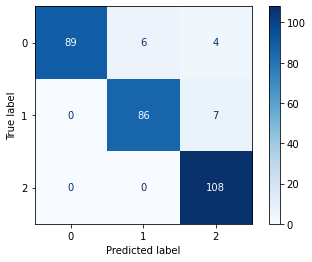

In [18]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

Looking at the weights, it is objectively lower that the weights obtained in the Logistic regression fitted with a 0.01 penalty term and the score is higher than the score obtained in the Logistic regression model fitted with a 0.001 penalty term.

# Lasso Regression penalty term (l1)

In [19]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]
# Obtaining the Cross validation scores for a l2 penalty term (Ridge)
cross_val_score(LogisticRegression(max_iter=10000 ,C=10e-3, multi_class='multinomial', solver='saga', penalty='l1'), X, y, cv=10)

array([0.94, 0.95, 0.92, 0.95, 0.98, 0.95, 0.94, 0.96, 0.96, 0.95])

In [20]:
# Perform Grid search cross validation for a l1 penalty term (Lasso)

clf = GridSearchCV(LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga', penalty='l1'), {
    'C': [1, 0.1, 0.01, 0.001, 0.0001]
}, cv=5, return_train_score=False)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([1.46214976, 3.02750959, 0.90370588, 0.01103129, 0.00463471]),
 'std_fit_time': array([0.40853133, 0.39447565, 0.0394745 , 0.00173395, 0.00276243]),
 'mean_score_time': array([0.00080028, 0.00168147, 0.00287595, 0.00041966, 0.0024826 ]),
 'std_score_time': array([0.00160055, 0.00182295, 0.00153863, 0.00083933, 0.0020338 ]),
 'param_C': masked_array(data=[1, 0.1, 0.01, 0.001, 0.0001],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 0.1}, {'C': 0.01}, {'C': 0.001}, {'C': 0.0001}],
 'split0_test_score': array([0.985, 1.   , 0.945, 0.365, 0.33 ]),
 'split1_test_score': array([0.99 , 0.975, 0.935, 0.365, 0.365]),
 'split2_test_score': array([0.995, 1.   , 0.96 , 0.365, 0.365]),
 'split3_test_score': array([1.   , 1.   , 0.955, 0.365, 0.365]),
 'split4_test_score': array([1.   , 0.985, 0.95 , 0.365, 0.335]),
 'mean_test_score': array([0.994, 0.992, 0.949, 0.365, 0.352]),
 'std_test

We want to get the smallest possible value for our regularization term, since a smaller value for C will reduce the variance of the model as much as possible, meaning that the model won't have a lot of noisy variables as their weights are effectively reduced to a value to 0 when using the Lasso Regression penalty term. We performed Cross validation 5 times on the data set using the GridSearchCV and also tested all these CV sets on 5 different values for C, being 1, 0.1, 0.01, 0.001 and 0.0001. It is clear that there is a trade off between score and the lower value of C, so we have to find a value for C that is as small as possible, but still obtains a high score. Looking at the results above, we can see that for a value of C between 0.01 and 0.001, we obtain a low value of C and a high accuracy score. There must be a point between 0.1 and 0.001 where the regularization term is small and where the score is as high as possible. It is quite clear that the penalty term between 0.1 and 0.01 gives a very high score, but we want to obtain a value as small as possible for C.

0.9333333333333333
(3, 23)
[[ 0.          0.          0.          0.         -0.12933138  0.
   0.          0.          0.         -0.12766665  0.          0.
   0.          0.         -0.09236372  0.         -0.13587873 -0.05921284
  -0.10226153 -0.1859535   0.          0.          0.        ]
 [ 0.02068576  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.13793341
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.12533612  0.          0.          0.
   0.          0.          0.          0.          0.          0.39411184
   0.          0.39595128  0.15918828  0.          0.          0.
   0.          0.          0.          0.          0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Pass

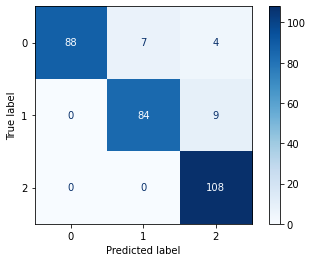

In [21]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=2000 ,C=10e-3, solver='saga' , penalty='l1', multi_class='multinomial')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

0.36
(3, 23)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passive Smoker' 'Chest Pain'
 'Coughing of Blood' 'Fatigue' 'Weight Loss' 'Shortness of Breath'
 'Wheezing' 'Swallowing Difficulty' 'Clubbing of Finger Nails'
 'Frequent Cold' 'Dry Cough' 'Snoring']


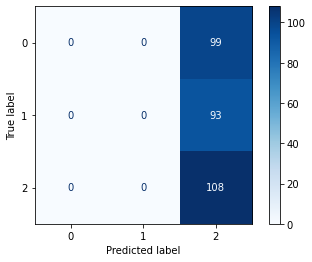

In [22]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=2000 ,C=10e-4, solver='saga' , penalty='l1', multi_class='multinomial')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

Looking at these two values, a penalty term or 0.001 reduces the weights of each variable to 0, so this means the penalty term of 0.001 is way to small. We have to find a value between 0.01 and 0.001 that maximizes the score, while minimizing the weights.

In [23]:
# Perform Grid search cross validation for a l2 penalty term (Ridge)
clf = GridSearchCV(LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga', penalty='l1'), {
    'C': [0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006]
}, cv=5, return_train_score=False)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([2.52138634, 2.22439599, 1.93343287, 1.77212849, 0.81371589,
        0.73170972, 0.73018084, 0.72755375, 0.58679957]),
 'std_fit_time': array([0.21556225, 0.05778531, 0.08790015, 0.06266011, 0.03743309,
        0.03356404, 0.08427023, 0.08694733, 0.02863432]),
 'mean_score_time': array([1.23600960e-03, 2.14772224e-03, 4.34398651e-05, 2.85825729e-03,
        1.26657486e-03, 1.64098740e-03, 1.48820877e-03, 1.58596039e-03,
        2.45962143e-03]),
 'std_score_time': array([1.00934635e-03, 1.88182165e-03, 8.68797302e-05, 1.67394591e-03,
        1.03441465e-03, 2.01402867e-03, 1.82592460e-03, 1.94258229e-03,
        2.01322553e-03]),
 'param_C': masked_array(data=[0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008, 0.007,
                    0.006],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.05},
  {'C': 0.04},
  {'C': 0.03},
  {'C': 0.02},
  

Looking at these values we can see that 0.009, 0.008 and 0.007 are all small values that obtains a very high score. By investigating the std_test_score, we can clearly see that 0.009 is the best value to choose as C, but lets investigate it a littel bit more.

0.9333333333333333
(3, 23)
[[ 0.          0.          0.          0.         -0.13464085  0.
   0.          0.          0.         -0.10332417  0.          0.
   0.          0.         -0.07486584  0.         -0.13088883 -0.04535731
  -0.08290182 -0.1660851   0.          0.          0.        ]
 [ 0.01947707  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.12457689
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.09671904  0.          0.          0.
   0.          0.          0.          0.          0.          0.37694402
   0.          0.39428084  0.14065944  0.          0.          0.
   0.          0.          0.          0.          0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Pass

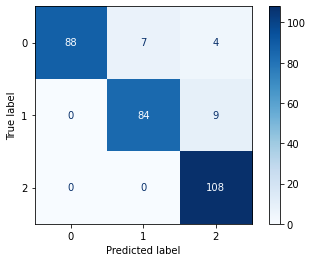

In [24]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=2000 ,C=0.009, solver='saga' , penalty='l1', multi_class='multinomial')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

0.9133333333333333
(3, 23)
[[ 0.          0.          0.          0.         -0.14076381  0.
   0.          0.          0.         -0.07802171  0.          0.
   0.          0.         -0.05593451  0.         -0.1242832  -0.03217859
  -0.05970173 -0.14346852  0.          0.          0.        ]
 [ 0.01810139  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.10755464
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.06435362  0.          0.          0.
   0.          0.          0.          0.          0.          0.35816311
   0.          0.39294162  0.12002738  0.          0.          0.
   0.          0.          0.          0.          0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Pass

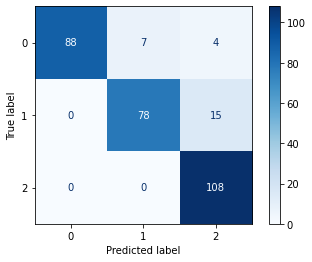

In [25]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=2000 ,C=0.008, solver='saga' , penalty='l1', multi_class='multinomial')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

0.8733333333333333
(3, 23)
[[ 0.          0.          0.          0.         -0.14801707  0.
   0.          0.          0.         -0.05199251  0.          0.
   0.          0.         -0.03562771  0.         -0.115355   -0.02043271
  -0.03140292 -0.11754738  0.          0.          0.        ]
 [ 0.01649301  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.08507551
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.02708048  0.          0.          0.
   0.          0.          0.          0.          0.          0.3376528
   0.          0.39222039  0.09661506  0.          0.          0.
   0.          0.          0.          0.          0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passi

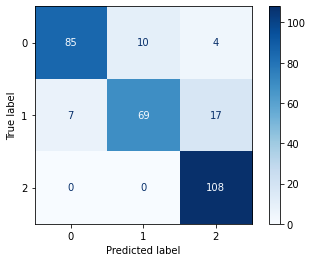

In [26]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=2000 ,C=0.007, solver='saga' , penalty='l1', multi_class='multinomial')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

After further investigating these values for C, we can see that 0.009 gives the best accuracy score trade off, so it is best to choose C as 0.009

0.9333333333333333
(3, 23)
[[ 0.          0.          0.          0.         -0.13470176  0.
   0.          0.          0.         -0.1033337   0.          0.
   0.          0.         -0.07489564  0.         -0.13089969 -0.04543998
  -0.08297682 -0.16614016  0.          0.          0.        ]
 [ 0.01947425  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.12445927
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.0967507   0.          0.          0.
   0.          0.          0.          0.          0.          0.37695063
   0.          0.39440341  0.14070017  0.          0.          0.
   0.          0.          0.          0.          0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Pass

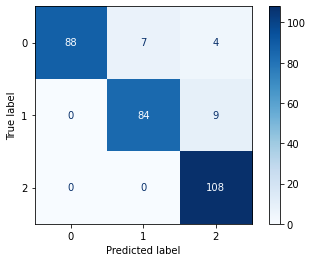

In [27]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=2000 ,C=0.009, solver='saga' , penalty='l1', multi_class='multinomial')
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

# Elasticnet (Both Lasso and Ridge regression penalty)

Elasticnet uses both the Ridge regression penalty(l2) and the Lasso regression penalty(l1). We use the logistic regressions parameter 'l1_ratio' to define what ratio of l1 and l2 we should use. The penalty is then determined by:

* l1_ratio x l1 + (1-l1_ratio) x l2

Thus the elasticnet penalty either reduces the weights of each coefficient to either 0 or close to 0. We are going to use a GridSearchCV to estimate the best ratio and the best possible penalty term.

In [25]:
# Perform Grid search cross validation for a l2/l1 penalty term (Ridge/Lasso)

clf = GridSearchCV(LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga', penalty='elasticnet'), {
    'C': [1, 0.1, 0.01, 0.001, 0.0001],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}, cv=5, return_train_score=False)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.82027807, 0.91604738, 0.91078181, 0.96273508, 0.96318278,
        0.92371998, 1.0622601 , 1.00306945, 1.09922624, 2.40969877,
        2.38488641, 2.72156906, 2.78020716, 2.83499351, 3.02686143,
        3.20550084, 2.60597   , 2.43880382, 1.8352406 , 1.4377728 ,
        1.37999978, 1.31966643, 1.43945494, 1.22952123, 1.11850338,
        1.21565504, 1.09387856, 0.65023975, 0.4169147 , 0.27559958,
        0.23291578, 0.20192218, 0.16022434, 0.06615949, 0.02049274,
        0.01296339, 0.01156888, 0.00639286, 0.00438838, 0.00479312,
        0.00498176, 0.00459962, 0.00459962, 0.00440598, 0.0046443 ]),
 'std_fit_time': array([0.06060144, 0.02010336, 0.04205807, 0.06668903, 0.01954725,
        0.02918425, 0.04181851, 0.02976382, 0.14511559, 0.03262545,
        0.05290159, 0.12371833, 0.22411962, 0.03780017, 0.15206688,
        0.11621794, 0.13301092, 0.4027995 , 0.11728241, 0.01429458,
        0.02432575, 0.03594198, 0.0920091 , 0.03331821, 0.01861567,
        0.093

It is quite hard to interpret these results, but taking a closer look at it, each row of the results is the different penalty term sizes, while each column represents the ratio between l2 and l1.

Knowing this and looking at the mean of each result, we can see that to obtain the highest possible score, and the lowest possible C value, we have to look at:
* C = 0.01; l1_ratio = 0.4
* C = 0.01; l1_ratio = 0.5
* C = 0.01; l1_ratio = 0.6

0.9466666666666667
(3, 23)
[[ 0.          0.          0.         -0.03656938 -0.0962146   0.
  -0.07357306  0.          0.         -0.21112368  0.          0.
   0.         -0.0116029  -0.16854639  0.         -0.14572216 -0.15399131
  -0.193891   -0.21940858 -0.03373594  0.         -0.04877973]
 [ 0.0311427   0.         -0.0605922   0.          0.05881363  0.
   0.          0.          0.          0.         -0.07759341  0.
   0.          0.          0.          0.          0.          0.16248527
   0.          0.03139856  0.          0.          0.08251299]
 [-0.00636225  0.          0.21428088  0.05492748  0.          0.
   0.          0.          0.0635287   0.06683178  0.03980589  0.32435682
   0.          0.28034232  0.26563312  0.          0.          0.
   0.          0.          0.          0.07539891  0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Pass

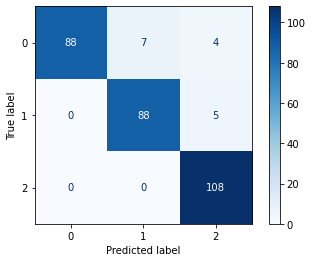

In [28]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.01, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.4)
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

0.9333333333333333
(3, 23)
[[ 0.          0.          0.         -0.03291856 -0.12195908  0.
  -0.04908129  0.          0.         -0.21472496  0.          0.
   0.          0.         -0.1617913   0.         -0.14616851 -0.14247134
  -0.1825574  -0.23035226 -0.0137178   0.         -0.03867194]
 [ 0.03002478  0.         -0.02061211  0.          0.          0.
   0.          0.          0.          0.         -0.0640723   0.
   0.          0.          0.          0.          0.          0.16300228
   0.          0.00315901  0.          0.          0.04901268]
 [-0.00133939  0.          0.2174952   0.01980146  0.          0.
   0.          0.          0.04754452  0.03279472  0.0318124   0.34022077
   0.          0.31334547  0.24801063  0.          0.          0.
   0.          0.          0.          0.05056662  0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Pass

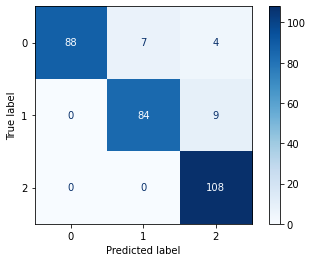

In [31]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.01, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.5)
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

0.9466666666666667
(3, 23)
[[ 0.          0.          0.         -0.0201342  -0.12499977  0.
  -0.01365951  0.          0.         -0.21173999  0.          0.
   0.          0.         -0.15110367  0.         -0.14766334 -0.13222043
  -0.17040065 -0.23150315  0.          0.         -0.02722026]
 [ 0.0275573   0.          0.          0.          0.          0.
   0.          0.          0.          0.         -0.04593061  0.
   0.          0.          0.          0.          0.          0.15270029
   0.          0.          0.          0.          0.01923446]
 [ 0.          0.          0.21949787  0.01050402  0.          0.
   0.          0.          0.03213369  0.01267764  0.02670452  0.3532642
   0.          0.34655819  0.23239338  0.          0.          0.
   0.          0.          0.          0.03331291  0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passi

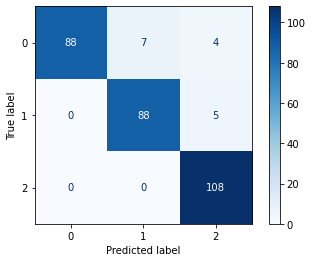

In [32]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.01, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.6)
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

After a closer investigation of our findings, we can see that a penalty term of 0.01 and an l1_ratio of 0.4 does indeed work the best, as it does reduce most of the coefficients to 0 and the coefficients that does not result to 0 is much closer to 0 and it has the smallest std_test_score.

So now we have to find the smallest value for C between 0.01 and 0.001 using the l1_ratio of 0.4

In [56]:
# Perform Grid search cross validation for a l2/l1 penalty term (Ridge/Lasso)

clf = GridSearchCV(LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), {
    'C': [0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]
}, cv=5, return_train_score=False)

clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([1.46992164, 1.23651662, 1.22534175, 1.22959394, 1.34312687,
        1.07287416, 0.78316579, 0.61301503, 0.43490238, 0.20980783]),
 'std_fit_time': array([0.14115645, 0.01625549, 0.06510247, 0.08787641, 0.1438134 ,
        0.10355056, 0.0314716 , 0.02508986, 0.01336076, 0.01072153]),
 'mean_score_time': array([0.0008132 , 0.00194182, 0.00198812, 0.00203915, 0.00164518,
        0.00408096, 0.00126619, 0.00157824, 0.00200825, 0.00119505]),
 'std_score_time': array([0.0016264 , 0.00244996, 0.00175398, 0.00177166, 0.00192695,
        0.00020264, 0.00169381, 0.00193351, 0.00177453, 0.0015729 ]),
 'param_C': masked_array(data=[0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003,
                    0.002, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.009},
  {'C': 0.008},
  {'C': 0.007},
  {'C': 0.006},
  {'C

Looking at these results, we can see the optimal values for C is:
* 0.009
* 0.008
* 0.007

We have to investigate this further

0.9466666666666667
(3, 23)
[[ 0.          0.          0.         -0.03884811 -0.10543717  0.
  -0.06532919  0.          0.         -0.19982558  0.          0.
   0.         -0.00803532 -0.15984798  0.         -0.14285029 -0.14511467
  -0.18409586 -0.20841788 -0.03000844  0.         -0.04704617]
 [ 0.03033041  0.         -0.04998222  0.          0.03741722  0.
   0.          0.          0.          0.         -0.07536918  0.
   0.          0.          0.          0.          0.          0.15743853
   0.          0.02855757  0.          0.          0.063633  ]
 [-0.00472851  0.          0.20485748  0.04736709  0.          0.
   0.          0.          0.06214825  0.06763061  0.04365046  0.30605896
   0.          0.27558469  0.25041187  0.          0.          0.
   0.          0.          0.          0.06587676  0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Pass

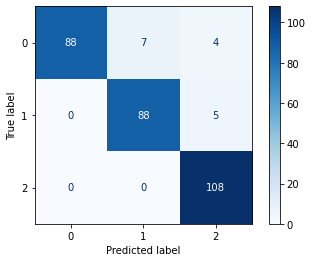

In [34]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.009, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.4)
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

0.9333333333333333
(3, 23)
[[ 0.          0.          0.         -0.04157323 -0.11423566  0.
  -0.05569908  0.          0.         -0.18737395  0.          0.
   0.         -0.00373984 -0.15018722  0.         -0.13950467 -0.1350739
  -0.17226967 -0.19563554 -0.02580446  0.         -0.04393429]
 [ 0.02938189  0.         -0.03785076  0.          0.01506953  0.
   0.          0.          0.          0.         -0.07235191  0.
   0.          0.          0.          0.          0.          0.15225264
   0.          0.02557131  0.          0.          0.04353317]
 [-0.0030715   0.          0.19450573  0.03967332  0.          0.
   0.          0.          0.06044065  0.06825891  0.04751393  0.28677474
   0.          0.26994932  0.23365977  0.          0.          0.
   0.          0.          0.          0.05468284  0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Passi

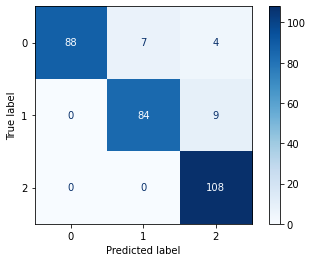

In [35]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.008, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.4)
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

0.9333333333333333
(3, 23)
[[ 0.          0.          0.         -0.04305102 -0.11929146  0.
  -0.04385585  0.          0.         -0.17242676  0.          0.
   0.          0.         -0.13864444  0.         -0.13525928 -0.12445397
  -0.1582525  -0.18241517 -0.0213291   0.         -0.04006342]
 [ 0.02832443  0.         -0.02393745  0.          0.          0.
   0.          0.          0.          0.         -0.06787847  0.
   0.          0.          0.          0.          0.          0.14474897
   0.          0.02085867  0.          0.          0.02132747]
 [-0.00090019  0.          0.18358295  0.03351634  0.          0.
   0.          0.          0.05980305  0.07020173  0.0511065   0.26637422
   0.          0.26506494  0.21506277  0.          0.          0.
   0.          0.          0.          0.04202733  0.        ]] ['Age' 'Gender' 'Air Pollution' 'Alcohol use' 'Dust Allergy'
 'OccuPational Hazards' 'Genetic Risk' 'chronic Lung Disease'
 'Balanced Diet' 'Obesity' 'Smoking' 'Pass

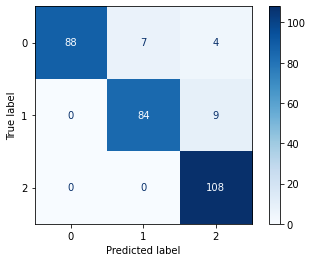

In [36]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.3, random_state=num)
log = LogisticRegression(max_iter=10000 ,C=0.007, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.4)
log.fit(X_new_train, y_new_train)

y_pred = log.predict(X_new_test)

print(log.score(X_new_test, y_new_test))
print(log.coef_.shape)
print(log.coef_, log.feature_names_in_)
cmx = confusion_matrix(y_new_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

Using Cross validation

In [39]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]
# Obtaining the Cross validation scores
cvs4 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), X, y, cv=10)
cvs3 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.008, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), X, y, cv=10)
cvs2 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.007, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), X, y, cv=10)
print(cvs4)
print(cvs3)
print(cvs2)

[0.96 0.96 0.94 0.96 0.97 0.96 0.95 0.98 0.96 0.97]
[0.96 0.96 0.94 0.96 0.97 0.96 0.95 0.97 0.96 0.97]
[0.94 0.96 0.94 0.96 0.97 0.96 0.95 0.97 0.96 0.97]


In [40]:
print(cvs4.mean())
print(cvs3.mean())
print(cvs2.mean())

0.9610000000000001
0.96
0.958


Looking at the trade off between these and the std_test_score, we can clearly see that a value of C=0.009 is the best in this case.

# Comparing our models

After using cross validation to tune our hyperparamaters, we have now obtained 3 logistic regression models with:
* l2 as the penalty and C = 0.005
* l1 as the penalty and C = 0.009
* elasticnet as the penalty, C = 0.009 and l1_ratio = 0.4

In [41]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_ratio = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), X, y, cv=10)
cvs_l2 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga'), X, y, cv=10)
cvs_l1 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='l1'), X, y, cv=10)

In [42]:
print(cvs_ratio)
print(cvs_l2)
print(cvs_l1)

[0.96 0.96 0.94 0.96 0.97 0.96 0.95 0.98 0.96 0.97]
[0.96 0.96 0.94 0.96 0.97 0.96 0.95 0.98 0.96 0.97]
[0.94 0.95 0.92 0.95 0.97 0.95 0.94 0.96 0.96 0.95]


In [43]:
print(cvs_ratio.mean())
print(cvs_l2.mean())
print(cvs_l1.mean())

0.9610000000000001
0.9610000000000001
0.9489999999999998


Using a CV of K = 10, we can see that the l2 penalty logistic regression and the elaticnet logistic regression performs the best.

In [44]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_ratio = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), X, y, cv=5)
cvs_l2 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga'), X, y, cv=5)
cvs_l1 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='l1'), X, y, cv=5)

In [45]:
print(cvs_ratio)
print(cvs_l2)
print(cvs_l1)

[0.96  0.95  0.965 0.965 0.965]
[0.96  0.95  0.965 0.965 0.96 ]
[0.945 0.935 0.96  0.955 0.95 ]


In [46]:
print(cvs_ratio.mean())
print(cvs_l2.mean())
print(cvs_l1.mean())

0.961
0.96
0.9490000000000001


Again using a CV of K = 5, we have larger test sets and it still comes out that the l2 penalty logistic regression and the elaticnet logistic regression model perform the best, but the elasticnet logistic regression model just about performs the best

In [53]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_ratio = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), X, y, cv=2)
cvs_l2 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga'), X, y, cv=2)
cvs_l1 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='l1'), X, y, cv=2)

In [54]:
print(cvs_ratio)
print(cvs_l2)
print(cvs_l1)

[0.936 0.944]
[0.948 0.952]
[0.894 0.922]


In [55]:
print(cvs_ratio.mean())
print(cvs_l2.mean())
print(cvs_l1.mean())

0.94
0.95
0.908


Using a CV of K = 2, effectively using an even larger test set, we can see that the l2 penalty logistic regression performs the best.

In [107]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_ratio = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), X, y, cv=20)
cvs_l2 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga'), X, y, cv=20)
cvs_l1 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='l1'), X, y, cv=20)

In [108]:
print(cvs_ratio)
print(cvs_l2)
print(cvs_l1)

[0.92 1.   0.92 1.   0.9  0.98 0.94 0.98 0.94 1.   0.96 0.96 0.98 0.92
 0.98 0.94 0.98 0.94 0.96 1.  ]
[0.92 1.   0.92 1.   0.9  0.98 0.94 0.98 0.94 1.   0.96 0.96 0.98 0.92
 0.98 0.94 0.98 0.94 0.96 1.  ]
[0.88 1.   0.9  1.   0.86 0.98 0.94 0.96 0.96 1.   0.94 0.96 0.96 0.92
 0.96 0.96 0.94 0.96 0.94 0.98]


In [109]:
print(cvs_ratio.mean())
print(cvs_l2.mean())
print(cvs_l1.mean())

0.96
0.96
0.9500000000000002


For a CV of K = 20, we can see that elasticnet and l2 perform the best again.

Taking all of this into consideration, we can choose between the elasticnet logistic regression model and the l2 logistic regression model, and since l2 uses both Lasso and Ridge regression penalties, the elasticnet reduces some of the coefficients to 0, meaning that variables that has little to no effect on the prediction will be completely ignored instead of the l2 penalty model, that always considers every variable.

In [110]:
X = df.drop(["Level_cat", "index"], axis=1)
y = df["Level_cat"]

cvs_ratio = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='elasticnet', l1_ratio=0.4), X, y, cv=50)
cvs_l2 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga'), X, y, cv=50)
cvs_l1 = cross_val_score(LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='l1'), X, y, cv=50)

In [111]:
print(cvs_ratio)
print(cvs_l2)
print(cvs_l1)

[0.85 0.95 1.   1.   1.   0.95 0.85 1.   1.   1.   0.95 0.8  0.95 1.
 1.   0.95 0.9  1.   1.   0.95 0.9  0.95 1.   1.   1.   0.95 0.9  0.95
 1.   1.   0.95 1.   0.9  0.9  1.   0.95 1.   1.   0.9  0.95 0.95 1.
 1.   1.   0.8  0.95 1.   1.   1.   1.  ]
[0.85 0.95 1.   1.   1.   0.95 0.85 1.   1.   1.   0.95 0.8  0.95 1.
 1.   0.95 0.9  1.   1.   0.95 0.9  0.95 1.   1.   1.   0.95 0.9  0.95
 1.   1.   0.95 1.   0.9  0.9  1.   0.95 1.   1.   0.9  0.95 0.95 1.
 1.   1.   0.8  0.95 1.   1.   1.   1.  ]
[0.9  0.85 0.95 1.   1.   0.9  0.85 1.   1.   1.   0.9  0.8  0.9  1.
 1.   0.95 0.9  1.   0.95 0.95 0.9  1.   1.   1.   1.   0.9  0.9  0.95
 1.   1.   0.9  1.   0.9  0.9  1.   0.9  1.   1.   0.9  0.95 0.9  1.
 1.   1.   0.9  0.85 1.   1.   1.   0.95]


In [113]:
print(cvs_ratio.mean())
print(cvs_l2.mean())
print(cvs_l1.mean())

0.96
0.96
0.95


Lastly we will look at the results when each model is fitted with most of the data.

We will take a closer look at the confusion matrix entries for 20 random samples.

In [148]:
TR = []
BL = []
scores = []
for i in range(0, 20):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    log = LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga')
    log.fit(X_new_train, y_new_train)

    y_pred = log.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(log.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [150]:
print(TR)
print(BL)
print(scores)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.96, 0.96, 0.95, 0.98, 1.0, 0.97, 0.95, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 0.91, 0.94, 0.97, 0.98, 0.95, 1.0, 0.96]


In [153]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

0.0
0.0
0.9664999999999999


This is very good from our Ridge regression model, as there are no cases where we predict a person to have a low chance of lung cancer, when the person actually has a high chance and there are no cases where we predict a person to have a high chance of lung cancer, when the person has a low chance. It also has an average score of 0.9665

In [154]:
TR = []
BL = []
scores = []
for i in range(0, 20):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    log = LogisticRegression(max_iter=10000 ,C=0.009, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.4)
    log.fit(X_new_train, y_new_train)

    y_pred = log.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(log.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [155]:
print(TR)
print(BL)
print(scores)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.96, 0.93, 0.95, 0.98, 0.99, 0.97, 0.96, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 0.91, 0.94, 0.97, 0.98, 0.95, 0.97, 0.96]


In [156]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

0.15
0.0
0.9635


The Elasticnet regression model performs very well. Out of 20 random samples, it never predicted a person to have a low chance of lung cancer, when the person had a high chance. It did however predict on one occasion that 3 people had a high chance of having lung cancer when the person had a low chance. It also had an average score of 0.9635 

In [157]:
TR = []
BL = []
scores = []
for i in range(0, 20):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    log = LogisticRegression(max_iter=2000 ,C=0.009, solver='saga' , penalty='l1', multi_class='multinomial')
    log.fit(X_new_train, y_new_train)

    y_pred = log.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(log.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [158]:
print(TR)
print(BL)
print(scores)

[1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 3, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.94, 0.9, 0.94, 0.97, 0.96, 0.95, 0.94, 0.96, 0.94, 0.97, 0.97, 0.96, 0.97, 0.91, 0.92, 0.96, 0.98, 0.94, 0.97, 0.97]


In [159]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

1.0
0.0
0.951


The Lasso regression model will on average predict one person to have a high chance of lung cancer when the person actually has a low chance. This is really not good and considering all of the previous investigation we have done, it is quite clear that the Lasso regression model is not the best model to use. It's average score was also the lowest at 0.951

In [160]:
TR = []
BL = []
scores = []
for i in range(0, 50):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    log = LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga')
    log.fit(X_new_train, y_new_train)

    y_pred = log.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(log.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [161]:
print(TR)
print(BL)
print(scores)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.96, 0.96, 0.95, 0.98, 1.0, 0.97, 0.95, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 0.91, 0.94, 0.97, 0.98, 0.95, 1.0, 0.96, 0.98, 0.92, 0.96, 0.98, 0.98, 0.95, 0.99, 0.95, 0.98, 0.97, 0.97, 0.95, 0.93, 0.94, 0.95, 0.95, 0.93, 0.97, 0.94, 0.99, 0.95, 0.97, 0.95, 0.94, 0.96, 0.95, 0.94, 0.95, 0.98, 0.96]


In [162]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

0.0
0.0
0.9612


When we use 50 random samples, we can see that Ridge regression performs very good again. Getting 0 and 0 again on the confusion matrix. We also get an average score of 0.9612

In [166]:
TR = []
BL = []
scores = []
for i in range(0, 50):
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size=0.1, random_state=i)
    log = LogisticRegression(max_iter=10000 ,C=0.009, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.4)
    log.fit(X_new_train, y_new_train)

    y_pred = log.predict(X_new_test)

    cmx = confusion_matrix(y_new_test, y_pred)
    TR.append(cmx[0,2])
    scores.append(log.score(X_new_test, y_new_test))
    BL.append(cmx[2,0])

In [167]:
print(TR)
print(BL)
print(scores)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.96, 0.93, 0.95, 0.98, 0.99, 0.97, 0.96, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 0.91, 0.94, 0.97, 0.98, 0.95, 0.97, 0.96, 0.98, 0.92, 0.96, 0.98, 0.98, 0.96, 0.99, 0.95, 0.98, 0.97, 0.97, 0.95, 0.94, 0.94, 0.95, 0.95, 0.93, 0.97, 0.95, 0.98, 0.95, 0.97, 0.95, 0.95, 0.96, 0.95, 0.94, 0.95, 0.98, 0.96]


In [168]:
TR = np.asarray(TR)
BL = np.asarray(BL)
scores = np.asarray(scores)
print(TR.mean())
print(BL.mean())
print(scores.mean())

0.06
0.0
0.9606


When we use 50 random samples, we can see that our Elastic regression model only predicts one top right wrong again and gets an average score of 0.9606

Here we can see that the Ridge regression performs the best. The last step we will use, that doesn't matter all tha much is to build our models based on the current approach.

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [171]:
log = LogisticRegression(max_iter=10000 ,C=0.005, multi_class='multinomial', solver='saga')
log.fit(X_train, y_train)

LogisticRegression(C=0.005, max_iter=10000, multi_class='multinomial',
                   solver='saga')

0.9533333333333334


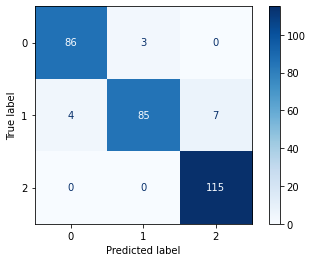

In [176]:
y_pred = log.predict(X_test)
print(log.score(X_test, y_test))
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

Current approach score: 0.9033333333333333

Improved approach score: 0.9533333333333334

In [177]:
log = LogisticRegression(max_iter=10000 ,C=0.009, solver='saga' , penalty='elasticnet', multi_class='multinomial', l1_ratio=0.4)
log.fit(X_train, y_train)

LogisticRegression(C=0.009, l1_ratio=0.4, max_iter=10000,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

0.9366666666666666


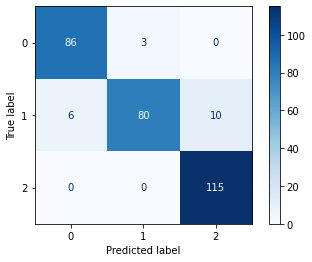

In [178]:
y_pred = log.predict(X_test)
print(log.score(X_test, y_test))
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

In [11]:
log = LogisticRegression(max_iter=10000 ,C=0.009, multi_class='multinomial', solver='saga', penalty='l1')
log.fit(X_train, y_train)

LogisticRegression(C=0.009, max_iter=10000, multi_class='multinomial',
                   penalty='l1', solver='saga')

0.93


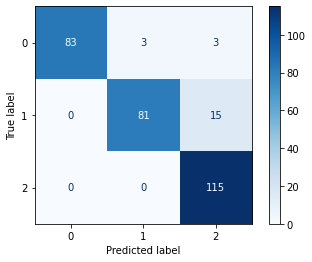

In [12]:
y_pred = log.predict(X_test)
print(log.score(X_test, y_test))
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cmx, display_labels=[0,1,2]).plot(cmap=plt.cm.Blues)
plt.show()

After all of the investigation, we saw that:
* Ridge regression has the smallest value for C (0.005)
* Ridge regression performs the best out of all the other models in terms of accuracy
* Ridge regression performs the best in terms of critical predictions (Top right and bottem left)
* Ridge regression gets the highest score when using the current approach's approach.

# Thus the best logistic regression model we can use for this data is a logistic regression model that uses a Ridge regression regularization term of C=0.005